 # Exploratory Data Analysis on the Zillow Home Prices Data
 
 ## Loading the libraries and data set

`ggplot2` and `tidyverse` libraries are used for data visualization and munging

The `lubridate` library is used here for easy operations with datetime objects.

The `fiftystater` and the `geofacet` packages are used for plotting the given values across the 50 states of the USA.
 

In [1]:
library(tidyverse)
library(ggplot2)
library(lubridate)
library(fiftystater)
library(geofacet)
library(magrittr)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date


Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract



In [2]:
# data read

state <- read.csv(file = 'State_time_series.csv')

## Introduction

Zillow collects , processes and publishes housing and economic data from a variety of propriety sources.To get an idea of the data we have, we shall ask several questions.

* How do the home values vary by tier type?
* How do the home values vary by time by tier?
* How do the rent to price ratio of homes change by state?
* How do the number of days on the Zillow database vary with the median value?
* How does the median value of the house rent per square feet change with time?


## How do the home values change by tier?

In [3]:
## How do the home values change by tier?
head(state, 10)

Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,⋯,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
1996-04-30,Alabama,NA,NA,NA,NA,NA,NA,NA,NA,⋯,45600,99500,79500,79000,140200,NA,NA,NA,NA,NA
1996-04-30,Arizona,NA,NA,NA,NA,NA,NA,NA,NA,⋯,67100,78900,103600,107500,168700,NA,NA,NA,NA,NA
1996-04-30,Arkansas,NA,NA,NA,NA,NA,NA,NA,NA,⋯,38400,70300,64400,64500,115200,NA,NA,NA,NA,NA
1996-04-30,California,NA,NA,NA,NA,NA,NA,NA,NA,⋯,95100,136100,157900,162000,270600,NA,NA,NA,NA,NA
1996-04-30,Colorado,NA,NA,NA,NA,NA,NA,NA,NA,⋯,82700,99400,128100,133600,209300,NA,NA,NA,NA,NA
1996-04-30,Connecticut,NA,NA,NA,NA,NA,NA,NA,NA,⋯,83700,85000,132000,141000,231600,NA,NA,NA,NA,NA
1996-04-30,Delaware,NA,NA,NA,NA,NA,NA,NA,NA,⋯,77200,NA,106800,107400,161600,NA,NA,NA,NA,NA
1996-04-30,Florida,NA,NA,NA,NA,NA,NA,NA,NA,⋯,52500,70600,86300,92100,155300,NA,NA,NA,NA,NA
1996-04-30,Georgia,NA,NA,NA,NA,NA,NA,NA,NA,⋯,57200,89300,92000,92400,163900,NA,NA,NA,NA,NA
1996-04-30,Hawaii,NA,NA,NA,NA,NA,NA,NA,NA,⋯,144500,177000,227400,262600,374700,NA,NA,NA,NA,NA


In [4]:


tier <- names(state)[grepl('Tier',names(state))]

In [5]:
total_distribution <- state %>%
    select(ends_with('Tier')) %>% mutate(date=state$Date) %>%
  mutate(date=ymd(date)) %>%
  na.omit() %>%
  gather(type,value,1:3) %>%
  select(value)

In [6]:
head(total_distribution)

value
45600
67100
38400
95100
82700
83700


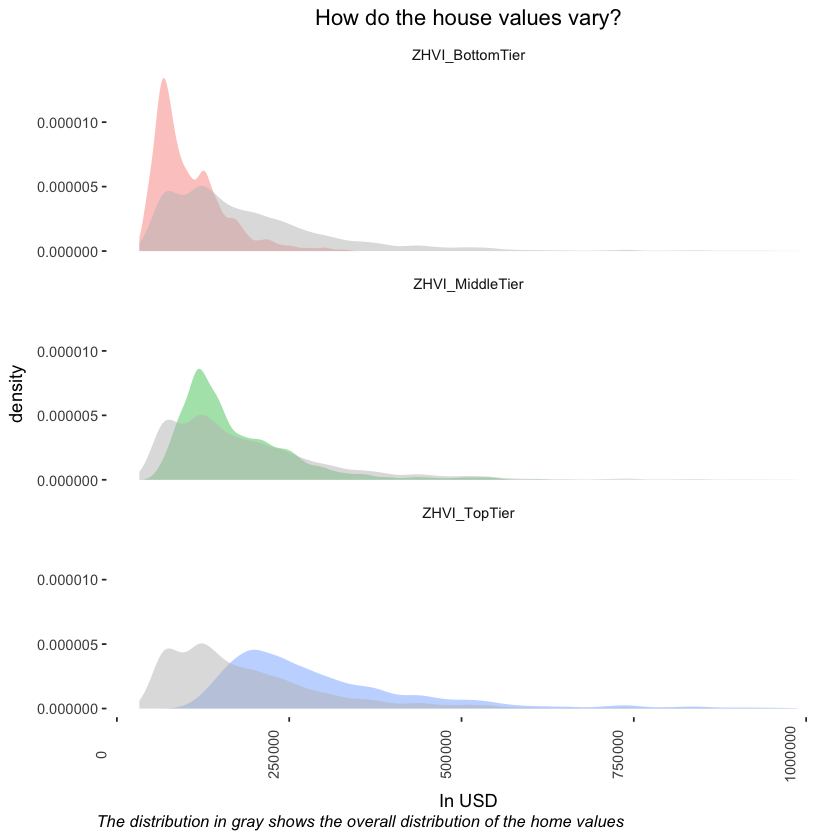

In [7]:
options(scipen=999)
state %>%
  select(ends_with('Tier')) %>% mutate(date=state$Date) %>%
  mutate(date=ymd(date)) %>%
  na.omit() %>%
  gather(type,value,1:3) %>%
  ggplot(aes(x=value,fill=type))+geom_density(alpha=0.4,color='transparent')+facet_wrap(~type,nrow = 3)+
  theme(panel.background = element_rect(fill = '#ffffff'),
        axis.text.x = element_text(vjust=-1,angle=90),
        strip.background = element_blank(),
        legend.position = 'none',plot.title = element_text(hjust=0.5),plot.caption = element_text(hjust=-0.05,face='italic'))+labs(title='How do the house values vary?',x='In USD',caption='The distribution in gray shows the overall distribution of the home values')+geom_density(data=total_distribution,aes(x=value),fill='gray',color='transparent',alpha=0.5)

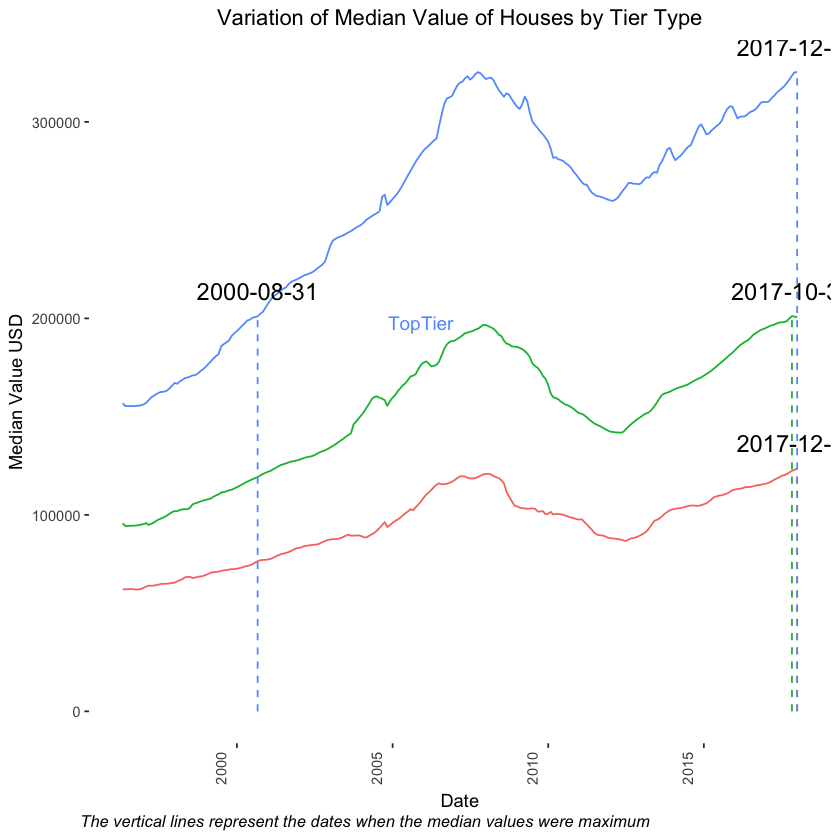

In [9]:
## How do the home values change with time across tiers

state_max <- state %>%
  select(ends_with('Tier')) %>% mutate(date=state$Date) %>%
  mutate(date=ymd(date)) %>%
  gather(type,value,1:3) %>%
  na.omit() %>%
  group_by(date,type) %>%
  summarise(median_value=median(value,na.rm=T)) %>%
  ungroup() %>%
  group_by(type) %>% 
  summarise(max_value=max(median_value)) %>%
  ungroup() %>%
    mutate(type=gsub("ZHVI_","",type))

state_when_max <- state %>%
  select(ends_with('Tier')) %>% mutate(date=state$Date) %>%
  mutate(date=ymd(date)) %>%
  gather(type,value,1:3) %>%
  na.omit() %>%
  group_by(date,type) %>%
  summarise(median_value=median(value,na.rm=T)) %>%
  ungroup() %>%
  filter(median_value %in% state_max$max_value) %>%
    mutate(type=gsub("ZHVI_","",type))

state_recession <- state %>%
  select(ends_with('Tier')) %>% mutate(date=state$Date) %>%
  mutate(date=ymd(date)) %>%
  gather(type,value,1:3) %>%
  na.omit() %>%
  group_by(date,type) %>%
  summarise(median_value=median(value,na.rm=T)) %>%
  filter(date>='2007-12-01' & date<='2009-06-30') %>%
  ungroup() %>%
    mutate(type=gsub("ZHVI_","",type)) 


state %>%
  select(ends_with('Tier')) %>% mutate(date=state$Date) %>%
  mutate(date=ymd(date)) %>%
  gather(type,value,1:3) %>%
  na.omit() %>%
  group_by(date,type) %>%
  summarise(median_value=median(value,na.rm=T)) %>%
  ungroup() %>%
  mutate(type=gsub("ZHVI_","",type)) %>%
  ggplot(aes(x=date,y=median_value,color=type))+geom_line()+theme(panel.background = element_rect(fill = '#ffffff'),
                                                                  axis.text.x = element_text(vjust=-1,angle=90),
                                                                  strip.background = element_blank(),
                                                                  legend.position = 'none',plot.title = element_text(hjust=0.5),
                                                                  plot.caption = element_text(hjust=-0.05,face='italic'))+labs(x='Date',y='Median Value USD',
                                                                                                   title='Variation of Median Value of Houses by Tier Type',
                                                                                                   caption='The vertical lines represent the dates when the median values were maximum'
                                                                                                  )+
  geom_segment(data=state_when_max,aes(x=date,y=0,xend=date,color=type,yend=median_value),linetype=2)+
  geom_text(data = state_when_max,aes(x=date,y=median_value,label=date),size=5,inherit.aes = F,vjust=-1)+
  geom_text(data = state_when_max,aes(x=date,y=median_value,label=type),size=4,inherit.aes = T,vjust=1,hjust=-2)

Warning message:
“Column `name` joining character vector and factor, coercing into character vector”

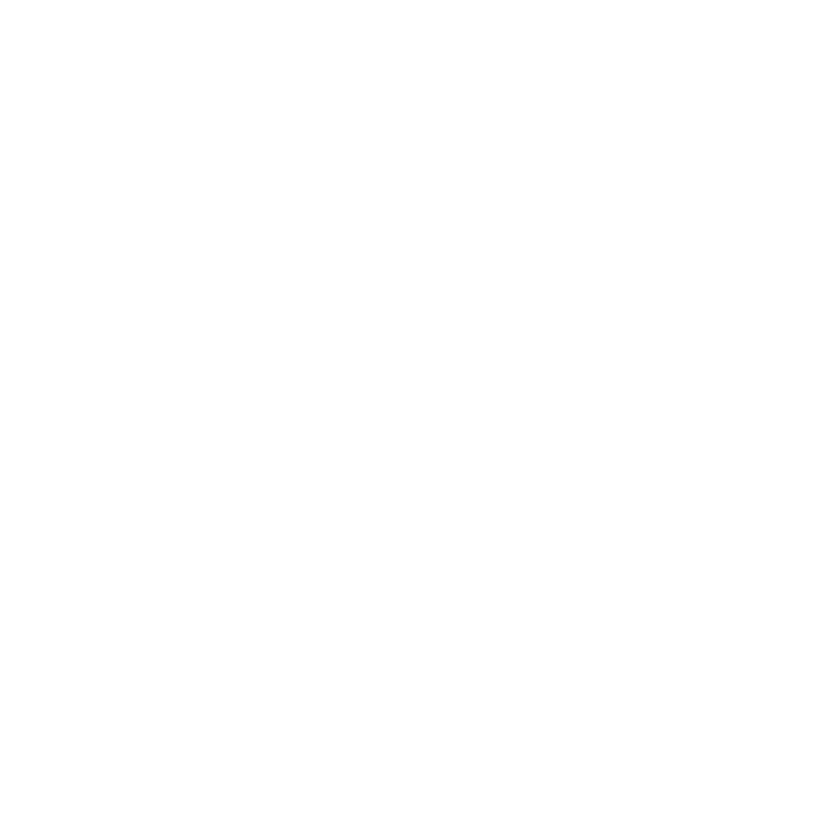

In [12]:
## How do the median price to rent ratio change across time across region?

state_map <- state %>% rename(name=RegionName)
state_grid_modified <- geofacet::us_state_grid1  %>%
   mutate(name=gsub(" ",'',name)) %>%
  inner_join(state_map,by='name')

state_grid_modified <- state_grid_modified %>%
  
  mutate(name=ifelse(name=='WestVirginia',"West Virginia",name)) %>%
  mutate(name=ifelse(name=='SouthDakota',"South Dakota",name)) %>%
  mutate(name=ifelse(name=='RhodeIsland',"Rhode Island",name)) %>%
  mutate(name=ifelse(name=='NorthDakota',"North Dakota",name)) %>%
  mutate(name=ifelse(name=='NorthCarolina',"North Carolina",name)) %>%
  mutate(name=ifelse(name=='NewMexico',"New Mexico",name)) %>%
  mutate(name=ifelse(name=='NewJersey',"New Jersey",name)) %>%
  mutate(name=ifelse(name=='NewHampshire',"New Hampshire",name)) %>%
  mutate(name=ifelse(name=='SouthCarolina','South Carolina',name)) %>%
  mutate(name=ifelse(name=='NewYork','New York',name)) %>%
  mutate(name=ifelse(name=='DistrictofColumbia','District of Columbia',name))
  
  
state_map <- state_grid_modified %>%
  mutate(state=tolower(name)) %>%
  group_by(state) %>%
  summarise(median_ratio=median(PriceToRentRatio_AllHomes,na.rm=T))
  




p <- state_map %>%
  rename(`Median Ratio of Price to Rent`=median_ratio) %>%
  ggplot(aes(map_id=state))+
  geom_map(aes(fill=`Median Ratio of Price to Rent`),map = fifty_states)+
expand_limits(x = fifty_states$long, y = fifty_states$lat) +
  coord_map()+theme(legend.position = 'none',axis.ticks = element_blank(),panel.background = element_blank(),axis.text = element_blank(),axis.title = element_blank(),plot.title = element_text(hjust = 0.5),plot.caption = element_text(hjust=-0.05,face='italic'),plot.subtitle = element_text(face = 'italic',size='8'))+labs(fill='',title='Median Price to Rent Ratio',caption='States in Red show that it is better to rent than to buy there',subtitle='Median of Price to Rent Ratio is Taken')+
  scale_fill_continuous(low='green',high='red')

#plotly::ggplotly(p)
p


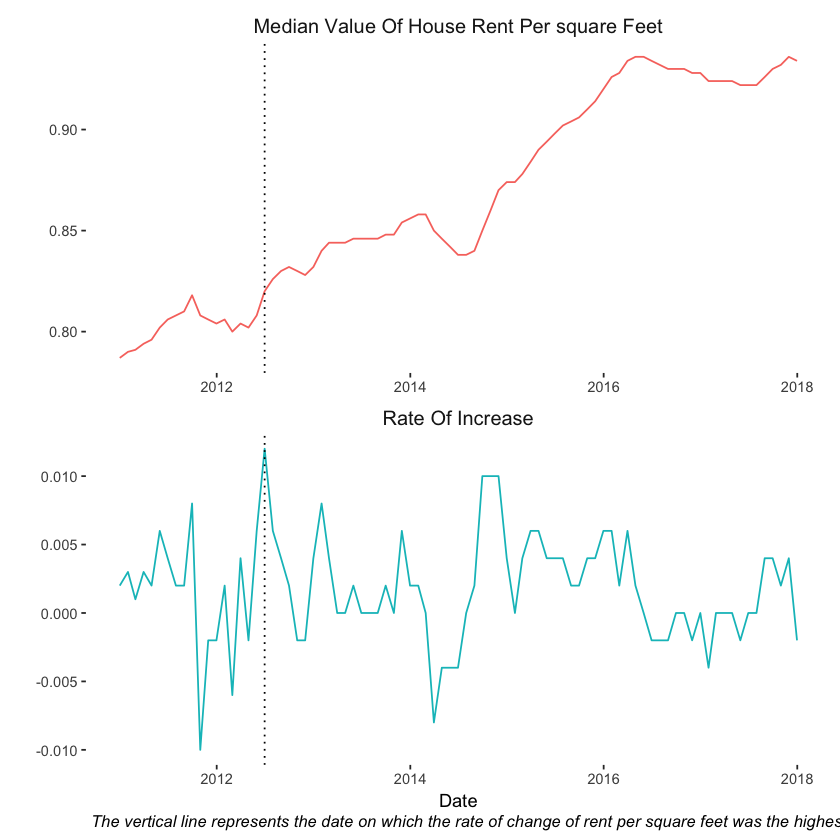

In [13]:
## Monthly rent variation for all homes and time?

data_median_rent_per_sq_feet <- state %>%
  select(ZriPerSqft_AllHomes,Date) %>%
  mutate(Date=ymd(Date)) %>%
  na.omit() %>%
  group_by(Date) %>%
  summarise(median_value=median(ZriPerSqft_AllHomes,na.rm=T)) %>%
  ungroup() %>%
  arrange(desc(Date)) %>%
  mutate(lead_median_value=lead(median_value)) %>%
  na.omit() %>%
  mutate(diff=median_value-lead_median_value) %>%
  select(Date,median_value,diff) %>%
  gather(type,value,2:3) %>%
  mutate(type=ifelse(type=='median_value',"Median Value Of House Rent Per square Feet","Rate Of Increase")) 

data_max_rent_per_sq_feet <- data_median_rent_per_sq_feet %>%
  filter(grepl('Rate',type)) %>%
  arrange(desc(value)) %>%
  head(1)



data_median_rent_per_sq_feet %>%

  ggplot(aes(x=Date,y=value,color=type))+geom_line()+theme(panel.background = element_blank(),strip.background = element_blank(),legend.position = 'none',plot.caption = element_text(hjust=-0.05,face='italic'),strip.text = element_text(size=12))+
  labs(x='Date',y='',caption=stringr::str_c('The vertical line represents the date on which the rate of change of rent per square feet was the highest :',data_max_rent_per_sq_feet$Date))+facet_wrap(~type,nrow=2,scales = 'free')+
  geom_vline(aes(xintercept=data_max_rent_per_sq_feet$Date),linetype=3)